<a href="https://colab.research.google.com/github/6058ah/DataScienceStudy/blob/master/chaper7_3_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#7.3 신경망 모델 훈련
##손실 곡선

In [13]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0


from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state=42)

In [14]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [15]:
model = model_fn()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [17]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


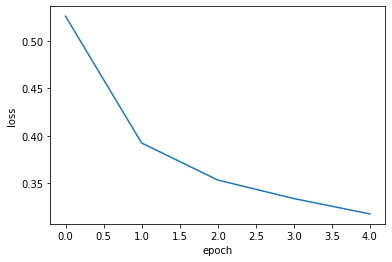

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

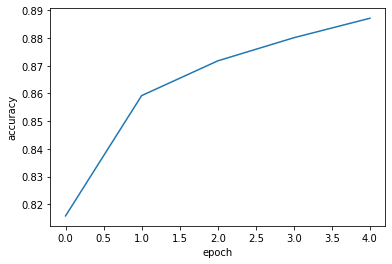

In [19]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

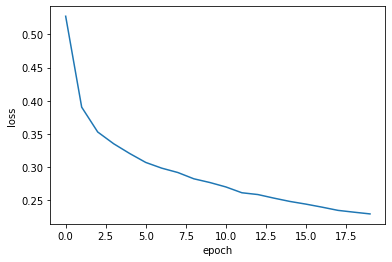

In [20]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

##검증 손실

In [21]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


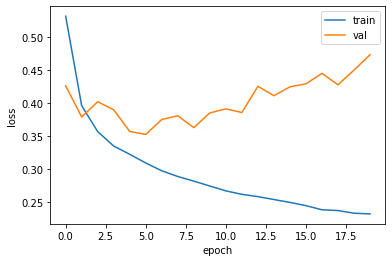

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

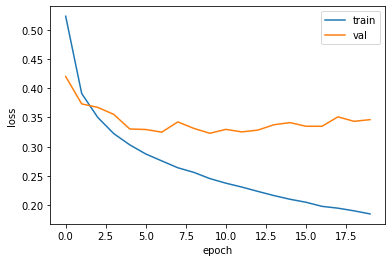

In [24]:
model = model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

##드롭아웃

In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


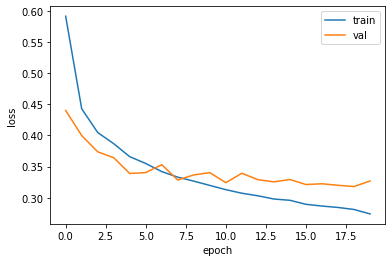

In [26]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

##모델 저장과 복원

In [27]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [28]:
model.save_weights('model-weights.h5')

In [29]:
model.save('model-whole.h5')

In [30]:
!ls -al *.h5

-rw-r--r-- 1 root root 332480 Apr 30 20:41 model-weights.h5
-rw-r--r-- 1 root root 981776 Apr 30 20:42 model-whole.h5


In [31]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [32]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels == val_target))

0.8809166666666667


In [33]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3389 - accuracy: 0.8809


[0.33886054158210754, 0.8809166550636292]

##콜백

In [34]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled,val_target), callbacks=[checkpint_cb])

In [35]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3298 - accuracy: 0.8820


[0.3298083245754242, 0.8820000290870667]

In [38]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history =model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled,val_target), callbacks=[checkpint_cb, early_stopping_cb])

In [39]:
print(early_stopping_cb.stopped_epoch)

6


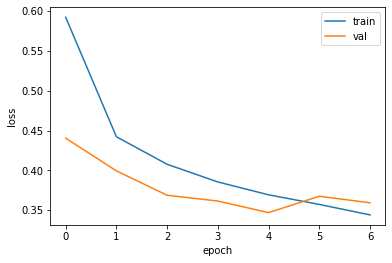

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [41]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3470 - accuracy: 0.8752


[0.3469599187374115, 0.875166654586792]